# Script to read and display data of the BTS2014 spectroradiometer

In [151]:
# import python libs
import os
import math
%matplotlib inline
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta

## Playground section
not necessary 

In [177]:
# playing with datetime module
dt = datetime(2019,8,23)

seconds=12720
dt2 = dt + timedelta(seconds=seconds)
print(dt.isoformat())
print(dt2.isoformat())


2019-08-23T00:00:00
2019-08-23T03:32:00


In [178]:
# execute Lionels program (test)
!python read_bts2048rh.py

Hello world!MP190623rh.OR0
WVL      1101
SPECT    22020
UVA      20
DATETIME 20
20190623
dict_keys(['dataflag', 'i8date', 'time', 'seconds', 'spect', 'uvint', 'uvind', 'uvb', 'uva', 'wvl', 'n', 'num', 'info', 'datetime'])
(20, 1101)


## Import local module(s) and define variables

In [200]:
# local module
import read_bts2048rh as bts

# set variables
p_bts = "data/"
#nam_bts = "MP190623.OR0"
nam_bts = "MP190901.OR0"
methodbts = "global"
#i8date = 20190623
i8date = 20190901
f_bts = p_bts+nam_bts

# call function of module
d_bts1day = bts.read_oro_bts(f_bts,methodbts,i8date)

## Plot data

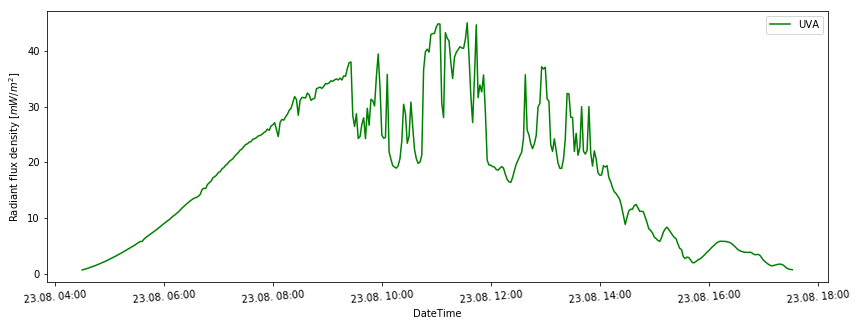

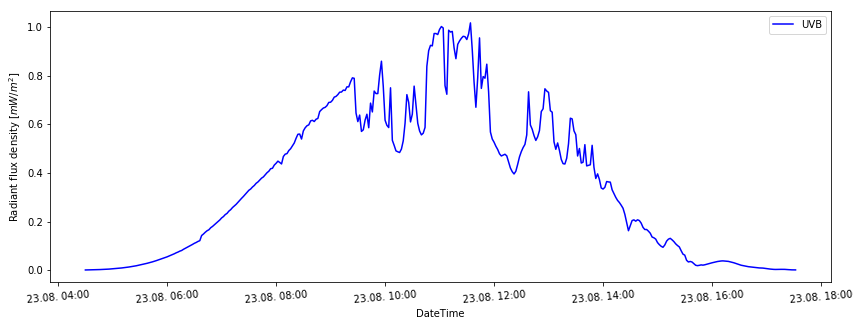

SHAPE uvb(392,)


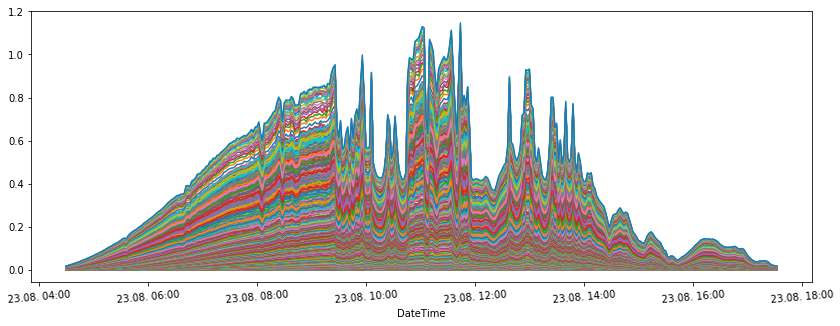

SHAPE spect(392, 1101)


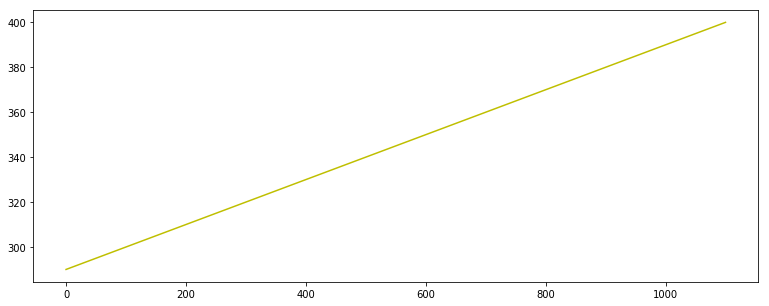

SHAPE wvl(1101,)


In [201]:
# set default figure size
plt.rcParams["figure.figsize"] = (13, 5)

# to display datetime on x-axis in a individual way
from matplotlib.dates import DayLocator, HourLocator, DateFormatter
#ax.xaxis.set_major_formatter(DateFormatter('%d.%m. %H:%M'))

# plot UVA
fig, ax = plt.subplots(1,1,figsize=(14,5))
ax.plot(d_bts1day["datetime"],d_bts1day["uva"], 'g', label="UVA")
#ax = plt.plot(d_bts1day["datetime"],d_bts1day["uva"],'g')
ax.xaxis.set_tick_params(rotation=5, labelsize=10)
ax.xaxis.set_major_formatter(DateFormatter('%d.%m. %H:%M'))
ax.legend()
ax.set_xlabel('DateTime')
ax.set_ylabel('Radiant flux density [$mW/m^2$]')
plt.show()

# plot UVB
fig, ax = plt.subplots(1,1,figsize=(14,5))
ax.plot(d_bts1day["datetime"],d_bts1day["uvb"], 'b', label="UVB")
ax.xaxis.set_tick_params(rotation=5, labelsize=10)
ax.xaxis.set_major_formatter(DateFormatter('%d.%m. %H:%M'))
ax.legend()
ax.set_xlabel('DateTime')
ax.set_ylabel('Radiant flux density [$mW/m^2$]')

plt.show()
print("SHAPE uvb" + str(d_bts1day["uvb"].shape))

# plot spectrum
fig, ax = plt.subplots(1,1,figsize=(14,5))
ax.plot(d_bts1day["datetime"],d_bts1day["spect"], label="spect")
ax.xaxis.set_tick_params(rotation=5, labelsize=10)
ax.xaxis.set_major_formatter(DateFormatter('%d.%m. %H:%M'))
#ax.legend()
ax.set_xlabel('DateTime')
plt.show()
print("SHAPE spect" + str(d_bts1day["spect"].shape))

# plot wavelength
plt.plot(d_bts1day["wvl"],'y')
plt.show()
print("SHAPE wvl" + str(d_bts1day["wvl"].shape))